Problema 1:

Se tiene una placa cuadrada de aluminio cuyos bordes están en las condiciones que se
indican en la figura: tres lados a temperaturas fijas y otro, el inferior, aislado térmicamente
(flujo de calor igual a cero). Encuentre, utilizando el método de diferencias finitas, los
valores de temperatura y flujo de calor para cada punto. Utilice primero la grilla señalada y
luego generalice el problema a un número variable de nodos en cada eje de coordenadas.
Haga un estudio del tiempo de cálculo en función del tamaño del sistema.



<img src="Enunciado 1.png" align="center">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
Nx=10
Ny=10
beta=Nx/Ny
Ta,Tb,Tc,Td=(75,0,50,100)
M=np.identity(Nx*Ny)
b=np.zeros((Nx*Ny,1))

In [3]:
Nk=Nx*Ny
for k in range(Nk):
    #Pregunto si estoy en un vértice:
    #Estructuras if/elseif - Parto de lo mas particular ahcia lo mas general.
    if k==0:
        #Vale el promedio:
        b[k]=(Ta+Tb)/2
        #vertice1
    elif k==(Nx-1):
        b[k]=(Tb+Tc)/2
        #vertice2
    elif k==(Nk-Nx):
        b[k]=(Ta+Td)/2
        #vertice3
    elif k==(Nk-1):
        b[k]=(Tc+Td)/2
        #vertice4
    #Pregunto si estoy en un borde,sin los vértices:
    elif k<(Nx-1):
        b[k]=Tb
        #BordeB
    elif k>(Nk-Nx):
        b[k]=Td
        #BordeD
    #Los indices de los bordes son multiplos de Nx
    #Miro que el resto de la division sea 0
    elif k%Nx==0:
        b[k]=Ta
        #BordeA
    elif (k+1)%Nx==0:
        b[k]=Tc
        #BordeC
    #Interior de la grilla, b ya lo tengo armo la matriz:
    else:
        M[k,k]=-2*(1+beta**2)
        M[k,k-1]=1
        M[k,k+1]=1
        M[k,k-Nx]=beta**2
        M[k,k+Nx]=beta**2
        #Interior matriz

In [4]:
print(M)
#imposible leer matrices gigantes

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


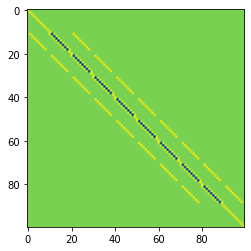

In [5]:
plt.imshow(M)
#Matriz del sistema lineal, no de T.

In [6]:
Temp=np.linalg.solve(M,b)

In [7]:
#Tengo un  vector (k), quiero volver a la matriz de indices originales i,j
Temp_ij=Temp.reshape(Nx,Ny)

Text(0.5, 1.0, 'Distribución de Temperaturas')

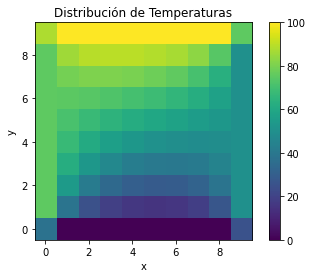

In [8]:
mappable=plt.imshow(Temp_ij, origin='lower')
plt.colorbar(mappable)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución de Temperaturas')

In [9]:
def makematrix(Nx,Ny,CC,TipoCC):
    """
    Nx:Numero de nodos en x
    Ny:Numero de nodos en y
    CC: 'A' 'B' 'C' 'D'
    TipoCC: 'Flujo' o 'Temp'
    """
    N=Nx*Ny
    beta=Nx/Ny
    M=np.eye(N)
    b=np.zeros([N,1])
    for k in range(N):
        #Vertice AB
        if k==0:
            if TipoCC['A']=='Flujo' and TipoCC['B']=='Temp':
                b[k]=CC['A'] #si tengo condición mixta, asigno al vértice la T
            elif TipoCC['A']=='Temp' and TipoCC['B']=='Flujo':
                b[k]=CC['B']
            else: #dos condiciones de flujo no voy a tener, asique si ambas son T asigno el promedio
                b[k]=(CC['A']+CC['B'])/2
        #Vértice BC
        elif k==Nx-1:
            if TipoCC['B']=='Flujo' and TipoCC['C']=='Temp':
                b[k]=CC['C'] #si tengo condición mixta, asigno al vértice la T
            elif TipoCC['B']=='Temp' and TipoCC['C']=='Flujo':
                b[k]=CC['C']
            else:
                b[k]=(CC['B']+CC['C'])/2
        #Vértice CD
        elif k==N-1:
            if TipoCC['C']=='Flujo' and TipoCC['D']=='Temp':
                b[k]=CC['D'] #si tengo condición mixta, asigno al vértice la T
            elif TipoCC['C']=='Temp' and TipoCC['D']=='Flujo':
                b[k]=CC['C']
            else :
                b[k]=(CC['C']+CC['D'])/2
        #Vértice AD
        elif k==N-Nx:
            if TipoCC['A']=='Flujo' and TipoCC['D']=='Temp':
                b[k]=CC['D'] #si tengo condición mixta, asigno al vértice la T
            elif TipoCC['D']=='Temp' and TipoCC['A']=='Flujo':
                b[k]=CC['D']
            else :
                b[k]=(CC['A']+CC['D'])/2
        #Borde A:
        elif k%Nx==0: #si k es multiplo de Nx
            if TipoCC['A']=='Temp':
                b[k]=CC['A']
            elif TipoCC['A']=='Flujo':
                #b[k]=0, ya es cero, tengo flujo quiero T, armo la matriz
                M[k,k]=-2*(1+beta**2)
                M[k,k-1]=0
                M[k,k+1]=2
                M[k,k+Nx]=beta**2
                M[k,k-Nx]=beta**2
        #Borde B:
        elif k<Nx: 
            if TipoCC['B']=='Temp':
                b[k]=CC['B']
            elif TipoCC['B']=='Flujo':
                #b[k]=0, ya es cero, tengo flujo quiero T, armo la matriz
                M[k,k]=-2*(1+beta**2)
                M[k,k-1]=1
                M[k,k+1]=1
                M[k,k-Nx]=0
                M[k,k+Nx]=2*beta**2
            #BordeC
        elif (k+1)%Nx==0: #si k es multiplo de Nx
            if TipoCC['C']=='Temp':
                b[k]=CC['C']
            elif TipoCC['C']=='Flujo':
                #b[k]=0, ya es cero, tengo flujo quiero T, armo la matriz
                M[k,k]=-2*(1+beta**2)
                M[k,k-1]=2
                M[k,k+1]=0
                M[k,k+Nx]=beta**2
                M[k,k-Nx]=beta**2
            #BordeD
        elif (k<N-1) and (k>N-Nx): #si k es multiplo de Nx
            if TipoCC['D']=='Temp':
                b[k]=CC['D']
            elif TipoCC['D']=='Flujo':
                #b[k]=0, ya es cero, lo inicialice asi.Tengo flujo quiero T, armo la matriz
                M[k,k]=-2*(1+beta**2)
                M[k,k-1]=1
                M[k,k+1]=1
                M[k,k-Nx]=2*beta**2
        else:
            M[k,k]=-2*(1+beta**2)
            M[k,k-1]=1
            M[k,k+1]=1
            M[k,k+Nx]=beta**2
            M[k,k-Nx]=beta**2
    return M,b

In [10]:
CC = {'A':75,'B':0,'C':50, 'D':100}
TipoCC = {'A':'Temp','B':'Temp','C':'Temp','D':'Temp'}
Nx=50
Ny=50

In [11]:
M,b=makematrix(Nx,Ny,CC,TipoCC)
T=np.linalg.solve(M,b)

Text(0, 0.5, 'j')

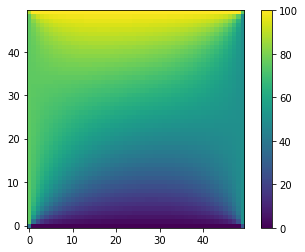

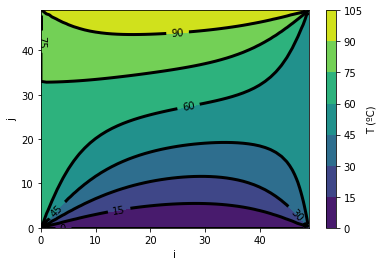

In [12]:
T_plot = T.reshape((Nx,Ny)) 
algo = plt.imshow(T_plot, origin= 'lower')
plt.colorbar()
fig, ax = plt.subplots()
mappable = ax.contourf(T_plot)
levels = ax.contour(T_plot, colors='k', linewidths=3)
cbar = plt.colorbar(mappable)
cbar.set_label('T (ºC)')
ax.clabel(levels, )
ax.set_xlabel('i')
ax.set_ylabel('j')

In [13]:
N = 15
Enes=np.linspace(3,100,N).astype(int)
t0=np.zeros((N,1))
tf=np.zeros((N,1))
for i in range (N):
    t0[i] = time.time()
    M,b=makematrix(Enes[i],Enes[i],CC,TipoCC)
    T=np.linalg.solve(M,b)
    tf[i]=time.time()
t=tf-t0

Text(0.5, 1.0, 'Tiempo de cálculo')

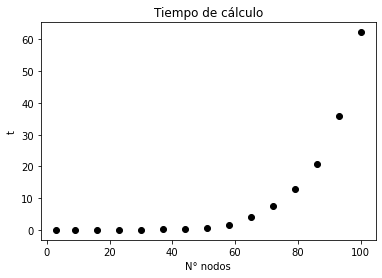

In [14]:
plt.plot(Enes,t, 'ok')
plt.xlabel('N° nodos')
plt.ylabel('t')
plt.title('Tiempo de cálculo')


Problema 2:

Considere el entramado mostrado en la figura, con una fuerza aplicada de 20 kN. Calcule
los desplazamientos de cada uno de los nodos y las tensiones que sufre cada elemento.
Todos los elementos tienen E = 210 GPa y una sección de 10 cm2, excepto el elemento 3,
que tiene una sección de 20 cm2. Los elementos 2 y 5 tienen una longitud de 8 metros y
el elemento 3 de 4 metros

<img src="Enunciado 2.png" align="center">

In [15]:
MN=np.array([[0,0],[8,0],[16,0],[8,4]])
MC=np.array([[0,3],[0,1],[1,3],[2,3],[1,2]])
E=np.array([210,210,210,210,210])*1E9
A=np.array([10,10,20,10,10])*1E-4
NN = MN.shape[0] #cantidad de nodos
NE,NNXE = MC.shape #numero de elementos y numero de nodos por elemento
GLXN=2 #grados de libertad por nodo
KGlobal = np.zeros([NNXE*GLXN,NNXE*GLXN])

In [16]:
def Kelemental_Barra (MN,MC,Ae,Ee,e):
    """
    MN:Matriz de nodos
    MC:Matriz de conectividad
    A:Area del elemento (np.array)
    E:Modulo de Young del elemento (np.array)
    e:Elemento
    """
    Nodo1 = MC[e,0]
    Nodo2 = MC[e,1]
    LonX = MN[Nodo2,0]-MN[Nodo1,0]
    LonY = MN[Nodo2,1]-MN[Nodo1,1]
    L=np.sqrt(LonX**2+LonY**2)
    Ang = np.arctan2(LonY,LonX)
    Kel = Ee*Ae/L
    c=np.cos(Ang)
    s=np.sin(Ang)
    Kelemental=np.array([[c**2,c*s,-c**2,-c*s],
                         [c*s,s**2,-c*s,-s**2],
                         [-c**2,-c*s,c**2,c*s],
                         [-c*s,-s**2,c*s,s**2]])*Kel
    return Kelemental

In [17]:
def KGlobal(MN, MC, E, A, GLXN):
    K_Global = np.zeros([GLXN*NN, GLXN*NN])    
    for e in range(NE):#Para cada elemento calculo la Kelemental
        Ee = E[e]
        Ae = A[e]
        Ke = Kelemental_Barra(MN, MC, Ee, Ae, e)
        print(Ke/np.max(Ke))
        for i in range(NNXE):
            rangoi = np.linspace(i*GLXN, (i+1)*GLXN-1, NNXE).astype(int)
            rangoni = np.linspace(MC[e, i]*GLXN, (MC[e, i]+1)*GLXN-1, NNXE).astype(int)
            for j in range(NNXE):
                rangoj = np.linspace(j*GLXN, (j+1)*GLXN-1, NNXE).astype(int)
                rangonj = np.linspace(MC[e, j]*GLXN, (MC[e, j]+1)*GLXN-1, NNXE).astype(int)
                K_Global[np.ix_(rangoni, rangonj)] += Ke[np.ix_(rangoi, rangoj)]
    return K_Global

In [18]:
KG=KGlobal(MN,MC,E,A,GLXN)
print(KG/np.max(KG))

[[ 1.    0.5  -1.   -0.5 ]
 [ 0.5   0.25 -0.5  -0.25]
 [-1.   -0.5   1.    0.5 ]
 [-0.5  -0.25  0.5   0.25]]
[[ 1.  0. -1. -0.]
 [ 0.  0. -0. -0.]
 [-1. -0.  1.  0.]
 [-0. -0.  0.  0.]]
[[ 3.74939946e-33  6.12323400e-17 -3.74939946e-33 -6.12323400e-17]
 [ 6.12323400e-17  1.00000000e+00 -6.12323400e-17 -1.00000000e+00]
 [-3.74939946e-33 -6.12323400e-17  3.74939946e-33  6.12323400e-17]
 [-6.12323400e-17 -1.00000000e+00  6.12323400e-17  1.00000000e+00]]
[[ 1.   -0.5  -1.    0.5 ]
 [-0.5   0.25  0.5  -0.25]
 [-1.    0.5   1.   -0.5 ]
 [ 0.5  -0.25 -0.5   0.25]]
[[ 1.  0. -1. -0.]
 [ 0.  0. -0. -0.]
 [-1. -0.  1.  0.]
 [-0. -0.  0.  0.]]
[[ 3.93674152e-01  8.20995152e-02 -2.29475121e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.64199030e-01 -8.20995152e-02]
 [ 8.20995152e-02  4.10497576e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -8.20995152e-02 -4.10497576e-02]
 [-2.29475121e-01  0.00000000e+00  4.58950242e-01  5.62051945e-17
  -2.29475121e-01  0.000000

In [19]:
def solve(KGlobal, s,r, Us, Fr):
    N = KGlobal.shape[1]
    F = np.zeros([NN*GLXN, 1])
    U = np.zeros([NN*GLXN, 1])
    U[s] = np.transpose([Us])
    F[r] = np.transpose([Fr])

    KRed = KGlobal[np.ix_(r,r)]
    KVin = KGlobal[np.ix_(r,s)]
    U[r] = np.linalg.solve(KRed, F[r]-KVin.dot(U[s]))
    F[s] = KGlobal[s,:].dot(U)

    return U,F

In [20]:
s=np.array([0,1,5])
r = np.array([i for i in range(NN*GLXN) if i not in s])
Us=np.zeros_like(s)#toma dim r y me hace zeros
Fr=np.zeros_like(r)
Fr[r==3]=-20E3
U, F = solve(KG, s,r, Us, Fr)

In [21]:
#Busco las tensiones

In [22]:
UMat=U.reshape(NN,GLXN) #Matriz donde cada fila es un nodo, y cxada columna sus GL

In [26]:
#Agrupo en MNF las posiciones finales de los nodos sumandole a la matriz de nodos, que tiene las posiciones de los mismos, los desplazamientos calculados
MNF=MN+UMat

In [27]:
Sigma=np.zeros([NE,1])

In [31]:
for e in range(NE):
    L0=np.sqrt((MN[MC[e,1],0]-MN[MC[e,0],0])**2+(MN[MC[e,1],1]-MN[MC[e,0],1])**2)
    Lf=np.sqrt((MNF[MC[e,1],0]-MNF[MC[e,0],0])**2+(MNF[MC[e,1],1]-MNF[MC[e,0],1])**2)
    DEF=Lf-L0
    Sigma[e]=E[e]*DEF

In [33]:
print(Sigma)

[[-1.99847128e+08]
 [ 1.60193908e+08]
 [ 4.00000000e+07]
 [-1.99847128e+08]
 [ 1.60193908e+08]]
